<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 8px; text-align: center;">
    <h1 style="color: #990011; margin: 8px 0;">Laptop Specs by Rating and Price - Exploratory and Inferential Data Analysis</h1>
    <p style="color: #990011; font-size: 20px; margin: 5px 0 0;">
        Dataset: 
        <a href="https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv" style="color: #0066cc; text-decoration: none;">
            https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv
        </a>
        <br>
        Chris Heimbuch: 
        <a href="https://github.com/chrisheimbuch" style="color: #0066cc; text-decoration: none;">
            https://github.com/chrisheimbuch
        </a>
    </p>
</div>

In [820]:
#Import libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from matplotlib.lines import Line2D 
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("Cleaned_Laptop_data.csv")
df.shape

(896, 23)

In [12]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [83]:
#Inspect data types and potential null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [42]:
#Check for null values.
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [13]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [344]:
df_copy = df.copy()

In [345]:
#Clean the ram_gb column

gb_replacement = {
    '4 GB GB': "4 GB",
    "8 GB GB": "8 GB",
    "16 GB GB": "16 GB",
    "32 GB GB": "32 GB"
}

df_copy['ram_gb'] = df_copy['ram_gb'].replace(gb_replacement)  


In [346]:
df_copy['ram_gb'].unique()

array(['4 GB', '8 GB', '32 GB', '16 GB'], dtype=object)

In [347]:
df_copy.head(30)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
5,Avita,PURA,AMD,APU Dual,10th,8 GB,DDR4,256 GB,0 GB,Windows,...,14,0,No,No,24990,33490,25,3.7,1657,234
6,HP,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,14,0,No,No,20900,22825,8,3.9,1185,141
7,Lenovo,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,21896,0,0,3.9,219,18
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB,DDR4,32 GB,0 GB,Windows,...,14,0,No,No,26899,27668,2,0.0,0,0
9,acer,Aspire,AMD,Athlon Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,1,No,No,31990,36990,13,4.2,76,13


In [348]:
#Add USD column for latest price and old price for USD
# https://www.xe.com/currencyconverter/ - source for converting as of 07/29/24

inrToUsd = 0.011939

df_copy['latest_price_usd'] = df_copy['latest_price'].map(lambda x: x * inrToUsd).round(2)
df_copy['old_price_usd'] = df_copy['old_price'].map(lambda x: x * inrToUsd).round(2)

In [349]:
#rename some columns for interpretability.

rename_columns = {
    "ssd": "solid_state_drive",
    "hdd": "hard_disk_drive",
    "os": "operating_system",
    "processor_gnrtn": "processor_generation",
    "Touchscreen": "touch_screen",
    "os_bit": "operating_system_bit",
    "reviews": "review_count"
}

df_copy.rename(columns=rename_columns, inplace=True)

In [350]:
df_copy.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_generation', 'ram_gb', 'ram_type', 'solid_state_drive',
       'hard_disk_drive', 'operating_system', 'operating_system_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'touch_screen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'review_count', 'latest_price_usd', 'old_price_usd'],
      dtype='object')

In [351]:
#clean up data in brands column so its all title case and not upper case or lowercase
df_copy['brand'] = df_copy['brand'].map(lambda x: x.title())
df_copy['brand'].unique()

array(['Lenovo', 'Avita', 'Hp', 'Acer', 'Asus', 'Dell', 'Redmibook',
       'Realme', 'Infinix', 'Msi', 'Microsoft', 'Smartron', 'Lg', 'Nokia',
       'Apple', 'Vaio', 'Mi', 'Alienware', 'Iball', 'Samsung'],
      dtype=object)

In [360]:
#Update missing to say unknown model
df_copy['model'] = df_copy['model'].replace("Missing", 'Unknown Model')

In [353]:
type(df_copy['weight'])

pandas.core.series.Series

In [359]:
#Create dataframe with items i will only be working with.
columns = ['brand', 'model', 'processor_brand','processor_name','processor_generation','ram_gb', 'ram_type', 'solid_state_drive', 'hard_disk_drive', 'operating_system', 'graphic_card_gb', 'weight', 'warranty', 'star_rating', 'ratings', 'latest_price_usd', 'old_price_usd']

clean_df = df_copy[columns]
clean_df.head()

,brand,model,processor_brand,processor_name,processor_generation,ram_gb,ram_type,solid_state_drive,hard_disk_drive,operating_system,graphic_card_gb,weight,warranty,star_rating,ratings,latest_price_usd,old_price_usd
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0,ThinNlight,0,3.7,63,298.36,391.48
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,0,Casual,0,3.6,1894,233.89,254.60
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,238.66,334.17
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,256.57,334.17
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,0,ThinNlight,0,3.7,1657,298.36,399.84


In [355]:
clean_df['star_rating'].unique()

array([3.7, 3.6, 3.9, 0. , 4.2, 2.3, 3.8, 3.1, 3.5, 4.5, 4. , 4.1, 4.3,
       4.4, 4.6, 4.8, 5. , 3.3, 4.7, 3.4, 3. , 2. , 3.2, 2.9, 2.8, 1.6,
       4.9, 1.7, 2.5, 2.7])

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 2: Descriptive Questions
</div>

### 1. Which brands are rated the highest?

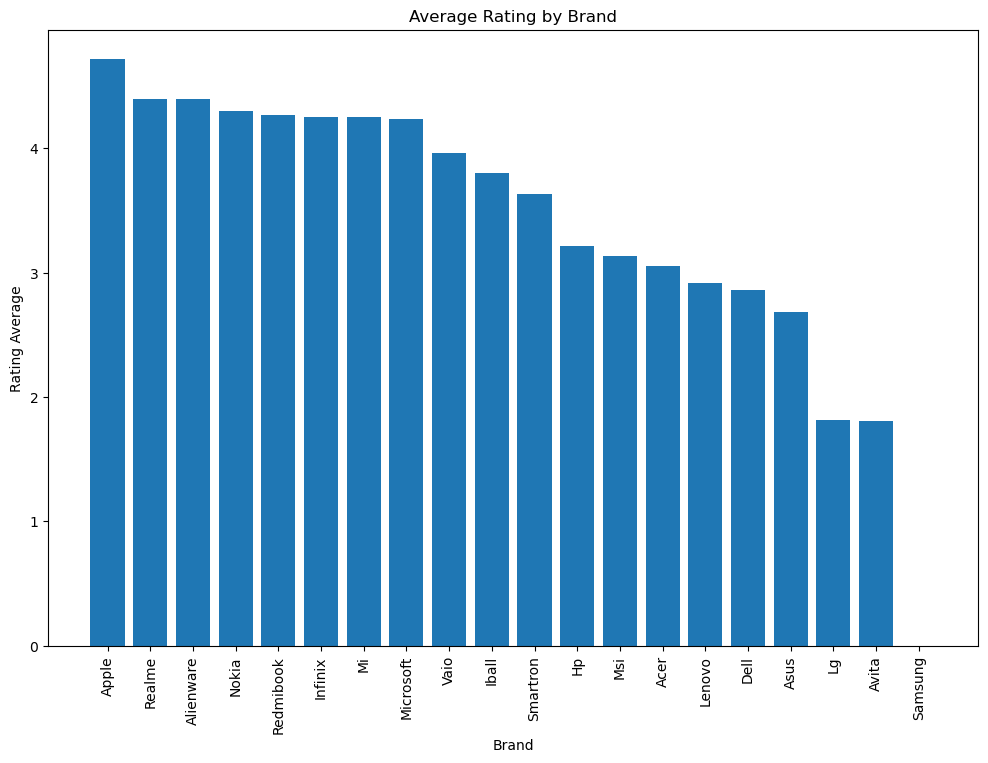

In [361]:
#Get average rating per brand
average_ratings = clean_df.groupby('brand')['star_rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='star_rating', ascending=False)
average_ratings

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=average_ratings['brand'], height=average_ratings['star_rating'])
ax.set_xlabel("Brand")
ax.set_ylabel("Rating Average")
ax.set_title("Average Rating by Brand")
plt.xticks(rotation=90)



plt.show()

### 2. Which brand is the most expensive?

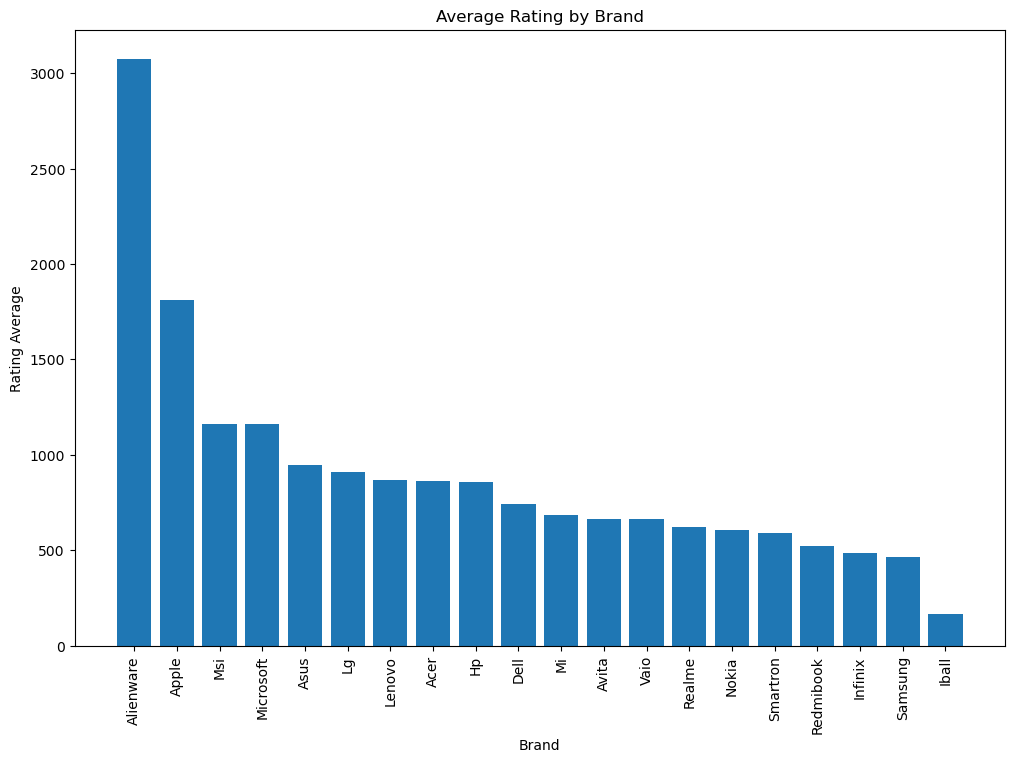

In [362]:
average_price = clean_df.groupby('brand')['latest_price_usd'].mean().reset_index()
average_price = average_price.sort_values(by='latest_price_usd', ascending=False)
average_price

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=average_price['brand'], height=average_price['latest_price_usd'])
ax.set_xlabel("Brand")
ax.set_ylabel("Rating Average")
ax.set_title("Average Rating by Brand")
plt.xticks(rotation=90)



plt.show()

### 3. Are AMD or Intel processor laptops more expensive?

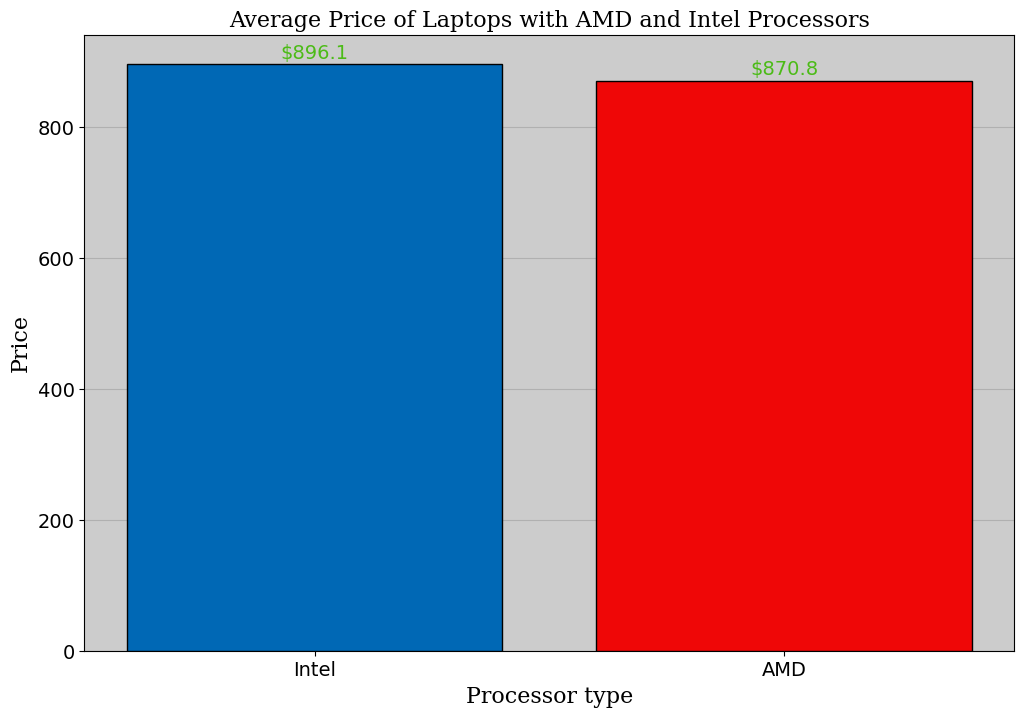

In [872]:
#Sort data for graphing
AMD_INTEL_MASK = (clean_df['processor_brand'] == "Intel") | (clean_df['processor_brand'] == "AMD")
amd_intel_df = clean_df[AMD_INTEL_MASK]
mean_amd_intel_df = amd_intel_df.groupby("processor_brand")['latest_price_usd'].mean().reset_index()

#Color map for both bars and color dictionary for fonts of axis.
color_mapping = ['#ef0707' for bar in range(2)]
color_mapping[1] = ('#0068B5')
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set up graph, label the axis + title
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(data=mean_amd_intel_df, x=mean_amd_intel_df['processor_brand'], height=mean_amd_intel_df['latest_price_usd'], color=color_mapping, zorder=3, edgecolor="black", linewidth=1)
ax.set_xlabel("Processor type", fontdict=font1)
ax.set_ylabel("Price", fontdict=font1)
ax.set_title("Average Price of Laptops with AMD and Intel Processors", fontdict=font1)

#Further customize the graph by adjusting font size of ticks.
ax.grid(axis='y')
ax.invert_xaxis()
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('#CCCCCC')

#Annotate the bars to add the average amount in USD.
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 32, 
        f'${height:.1f}', 
        ha='center', 
        va='top', 
        color='#4CBB17', 
        fontsize=14)

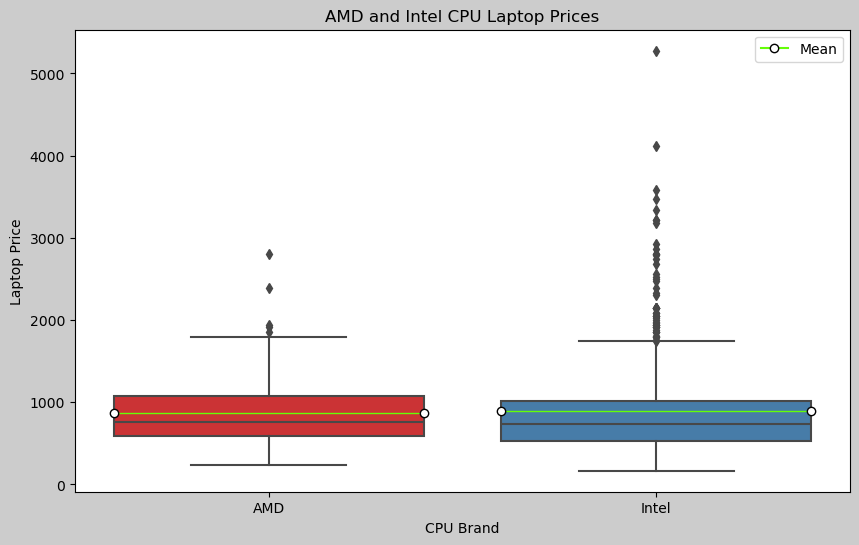

In [364]:


plt.figure(figsize=(10, 6), facecolor="#cccccc")
sns.boxplot(x='processor_brand', 
            y='latest_price_usd', 
            data=amd_intel_df, 
            palette="Set1",
            showmeans=True, 
            meanline=True, 
            meanprops={"marker":"o", "linestyle":"-", "color":"#65fe08",  "markerfacecolor":"white", "markeredgecolor":"black"}
            )


# Add custom legend for the mean line and add it to the plot
mean_line = Line2D([0], [0], color='#65fe08', marker='o', markerfacecolor='white', markeredgecolor='black', linestyle='-', label='Mean')
plt.legend(handles=[mean_line], loc='upper right')

plt.title('AMD and Intel CPU Laptop Prices')
plt.xlabel('CPU Brand')
plt.ylabel('Laptop Price')
plt.show()

### 4.	Which operating systems are rated the highest?

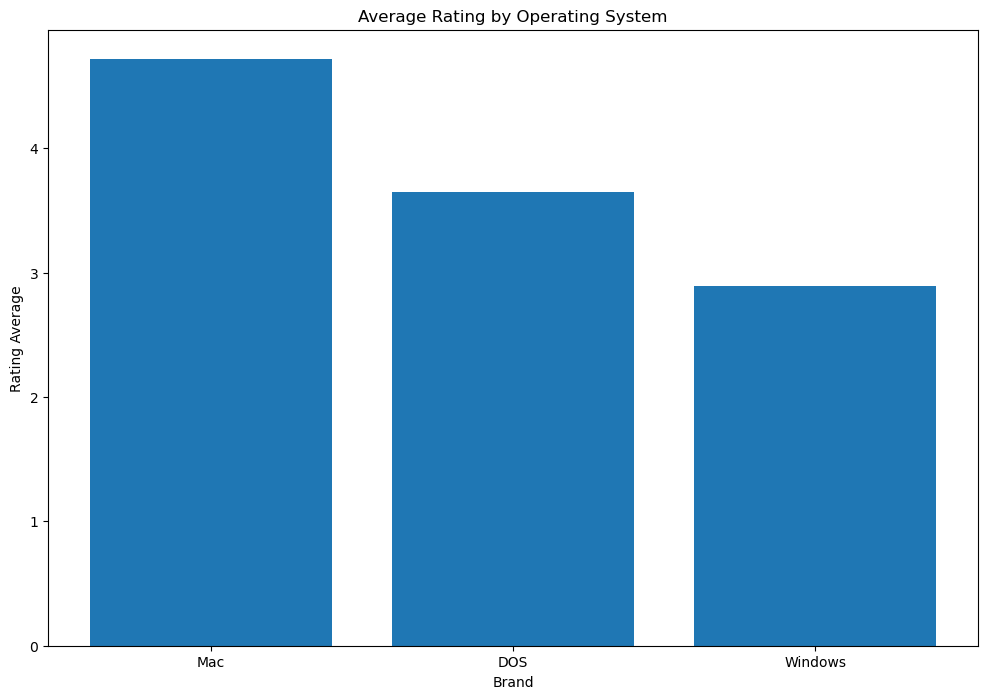

In [365]:
clean_df['operating_system'].unique()
os_ratings = clean_df.groupby("operating_system")['star_rating'].mean().reset_index()
os_ratings = os_ratings.sort_values(by='star_rating', ascending=False)



# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=os_ratings['operating_system'], height=os_ratings['star_rating'])
ax.set_xlabel("Brand")
ax.set_ylabel("Rating Average")
ax.set_title("Average Rating by Operating System")


plt.show()


### 5.	Of the top thirty models, which models are the most expensive?

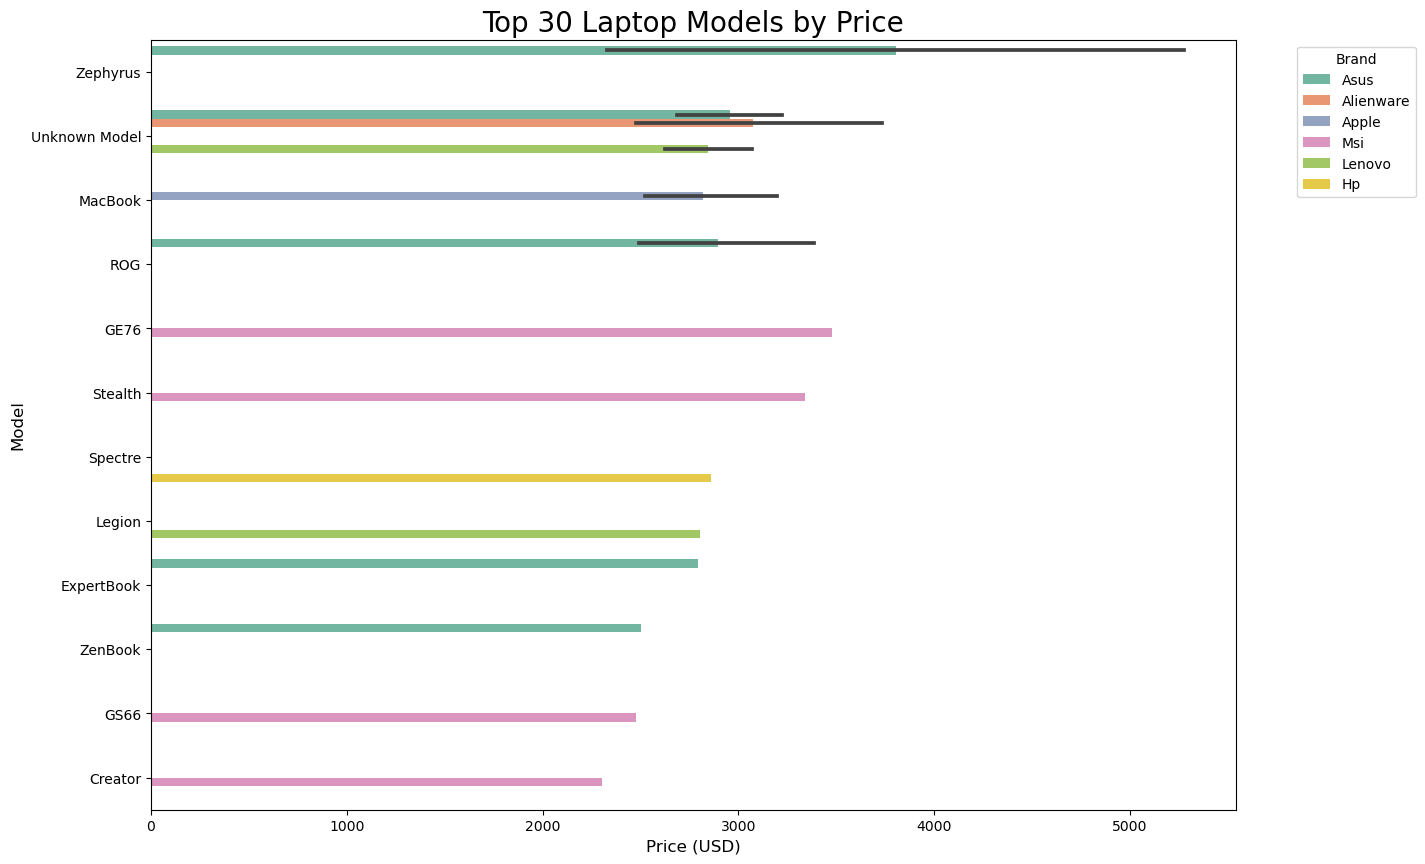

In [367]:
clean_df['model'].unique()
columns_models = ['brand','model','latest_price_usd']
model_brand_price = clean_df[columns_models].sort_values(by="latest_price_usd", ascending=False).head(30)


#
plt.figure(figsize=(14, 10))
sns.barplot(x='latest_price_usd', y='model', hue='brand', data=model_brand_price, dodge=True, palette='Set2')
plt.title('Top 30 Laptop Models by Price', fontsize=20)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [301]:
clean_df['model'].unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', 'Missing', 'v15', 'VivoBook', 'EeeBook', 'Nitro',
       'Cosmos', 'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro',
       '15', 'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad',
       'Chromebook', 'Commercial', '14s', 'INSPIRON', 'V15', '15s',
       '3000', 'Notebook', 'Vivo', 'DA', 'Insprion', 'Travelmate', '14a',
       'Predator', 'Spin', 'Swift', 'ROG', 'XPS', 'Omen', 'Surface',
       't.book', 'Yoga', 'Gram', 'Spectre', 'VivoBook14', 'TUF',
       'Book(Slim)', 'Pro', 'PureBook', 'ASUS', 'Katana', 'GF63',
       'Thinkbook', 'Intel', 'G15', 'ZenBook', 'Legion', 'Modern',
       'ThinkBook', 'Prestige', 'Zenbook', 'MacBook', 'Sword', 'Envy',
       'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad', 'Inpiron',
       'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76', 'GP65',
       'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65', 'Stealth',
       'Zephyrus', 'Summit', 'OMEN

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 3: Inferential Questions Analysis
</div>

In [464]:
#Define function for testing our hypothesis.

def test_outcome(pvalue, alpha=0.05):
    if pvalue < alpha:
        return "Reject the null hypothesis."
    else:
        return "Fail to reject the null hypothesis."

#Creating sample for analysis.
df_sample_a = clean_df.sample(n=200, random_state=1)

#Slicing the sample to include only ratings that have merit (0.0 can be null values.)
good_rating_sample = df_sample_a[df_sample_a['star_rating'] > 0.0]
good_rating_df = clean_df[clean_df['star_rating'] > 0.0]

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.1 Let's check visually and run a Shapiro-Wilkes test to see if our data distribution is normal. 
</div>

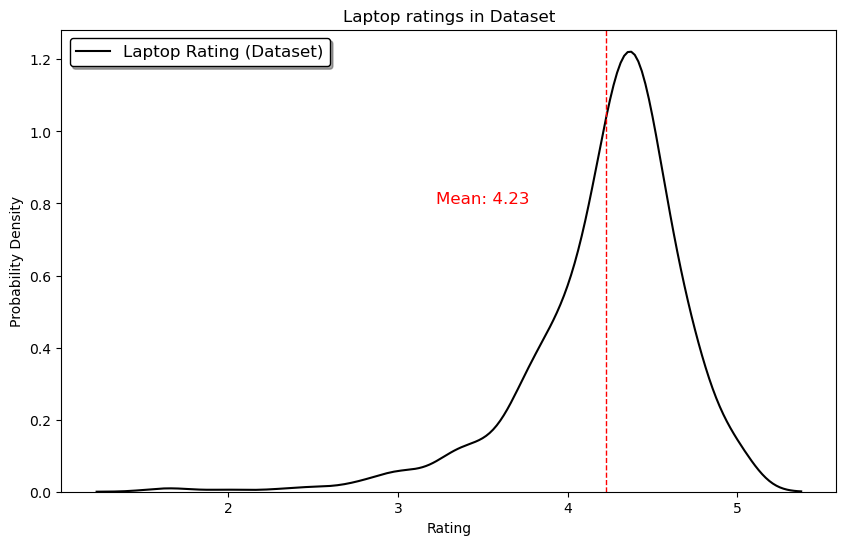

In [515]:
#Inspected the Dataset to see how the rating data is distributed for ratings (data does not include 0 ratings).

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_df, x="star_rating", color='black', label="Laptop Rating (Dataset)", fill=False)


#Labeling axes
plt.title("Laptop ratings in Dataset")
plt.xlabel('Rating')
plt.ylabel('Probability Density')

# Add a vertical line at the mean
mean_points = good_rating_df['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

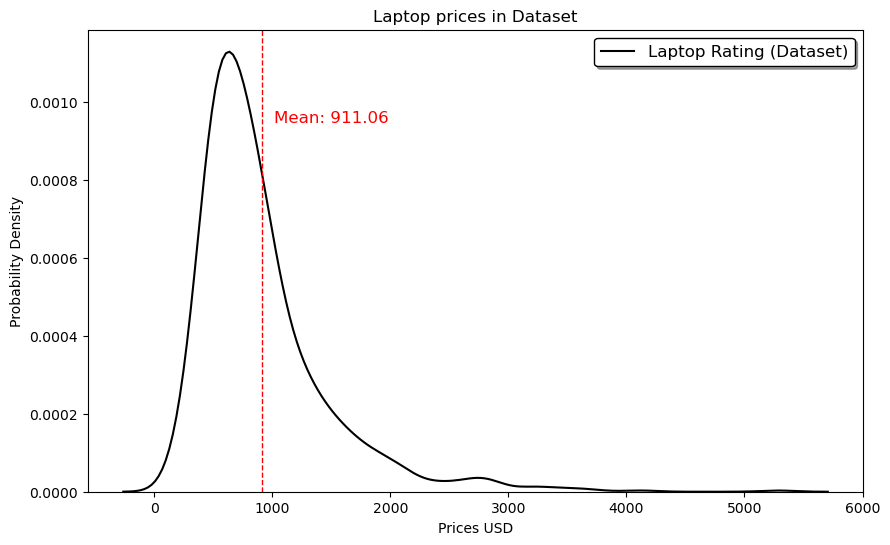

In [410]:
#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=clean_df, x="latest_price_usd", color='black', label="Laptop Rating (Dataset)", fill=False)


#Labeling axes
plt.title("Laptop prices in Dataset")
plt.xlabel('Prices USD')
plt.ylabel('Probability Density')

# Add a vertical line at the mean
mean_points = clean_df['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [461]:
df_sample_a['star_rating'].value_counts()


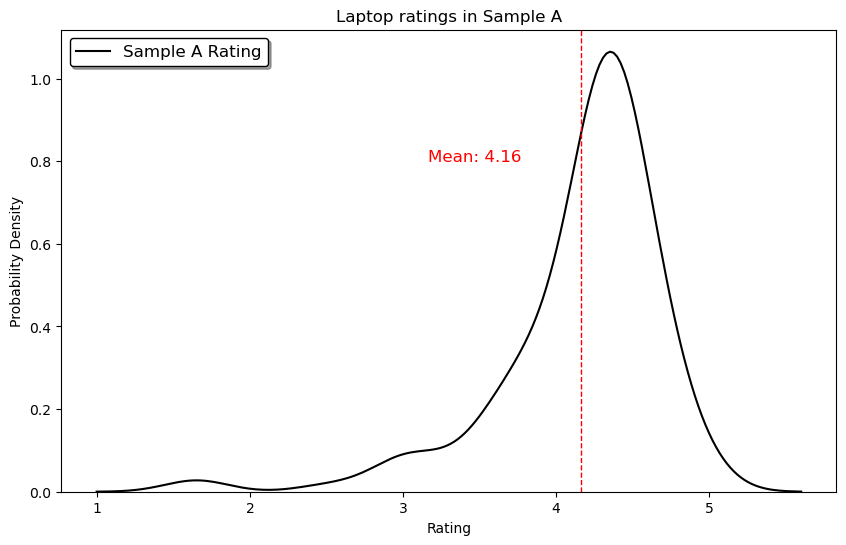

In [514]:
#Inspecting the sample to see how the rating data is distributed for ratings.

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_sample, x="star_rating", color='black', label="Sample A Rating", fill=False)


#Labeling axes
plt.title("Laptop ratings in Sample A")
plt.xlabel('Rating')
plt.ylabel('Probability Density')

# Add a vertical line at the mean
mean_points = good_rating_sample['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

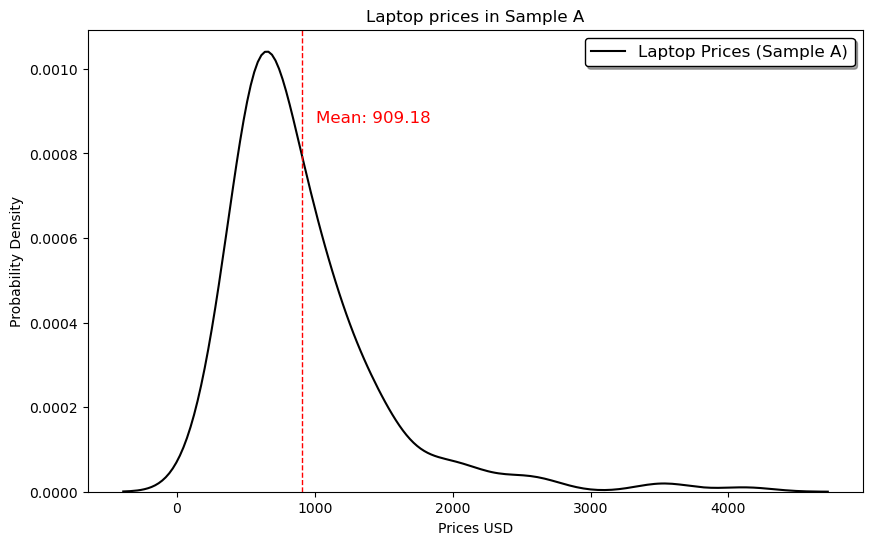

In [419]:
#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=df_sample_a, x="latest_price_usd", color='black', label="Laptop Prices (Sample A)", fill=False)


#Labeling axes
plt.title("Laptop prices in Sample A")
plt.xlabel('Prices USD')
plt.ylabel('Probability Density')

# Add a vertical line at the mean
mean_points = df_sample_a['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [467]:
#Performing normality test for ratings.

stat, p_val = stats.shapiro(good_rating_sample['star_rating'])
p_val

# interpret
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


Sample does not look Gaussian (reject H0)


In [416]:
#Performing normality test for price.

stat, p_val = stats.shapiro(df_sample_a['latest_price_usd'])
p_val

# interpret
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### Interpretation

After examining the distribution of latest prices and ratings, we have a Non-Parametric distribution for our dataset (Non-Gaussian or non-normal), and therefore we will need to perform Nonparametric statistical significance tests such as Mann-Whitney U Test (Non Parametric version of Students T-Test) and Kruskal-Wallis H Test (Non Parametric version of ANOVA Test) 

### 1. Is there a significant difference in the prices between laptops with different processor brands (e.g., Intel vs. AMD)? (Mann-Whitney U Test)

$H_0$: _There is no difference in price between laptops with different processor brands._

$H_1$: _There is a difference in price between laptops with different processor brands._

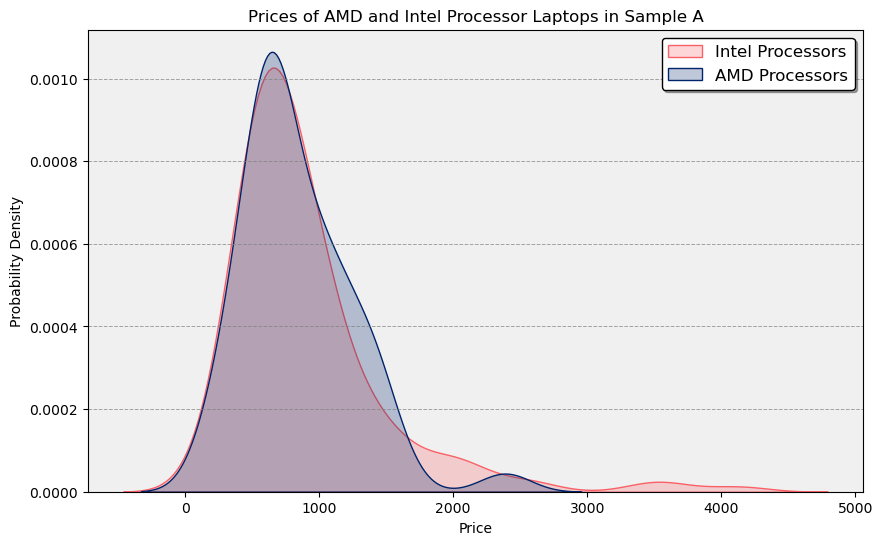

In [446]:
sample_processor_intel = df_sample_a[df_sample_a['processor_brand'] == "Intel"]['latest_price_usd']
sample_processor_amd = df_sample_a[df_sample_a['processor_brand'] == "AMD"]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_processor_intel, x=sample_processor_intel, color='#F96167', label="Intel Processors", fill=True)
sns.kdeplot(data=sample_processor_amd, x=sample_processor_amd, color='#00246B', label="AMD Processors", fill=True)

#Labeling axes
plt.title("Prices of AMD and Intel Processor Laptops in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [505]:
#Interpret Results
stat, p_val = mannwhitneyu(sample_processor_intel, sample_processor_amd)
p_val


alpha = 0.05

test_outcome(p_val, alpha=alpha)

'Fail to reject the null hypothesis.'

### Interpretation

Based on our test outcome, we have found that there is no significant difference between the means of price in each sample of laptops that have Intel processors and laptops that have AMD processors.


### 2. Do laptops with solid-state drives (SSD's) have significantly different prices compared to those with hard disk drives (HDD's)? (Mann-Whitney U Test)

$H_0$: _There is no difference in price between laptops with SSD's compared to Laptops with HDD's._

$H_1$: _There is a difference in price between laptops with SSD's compared to Laptops with HDD's._

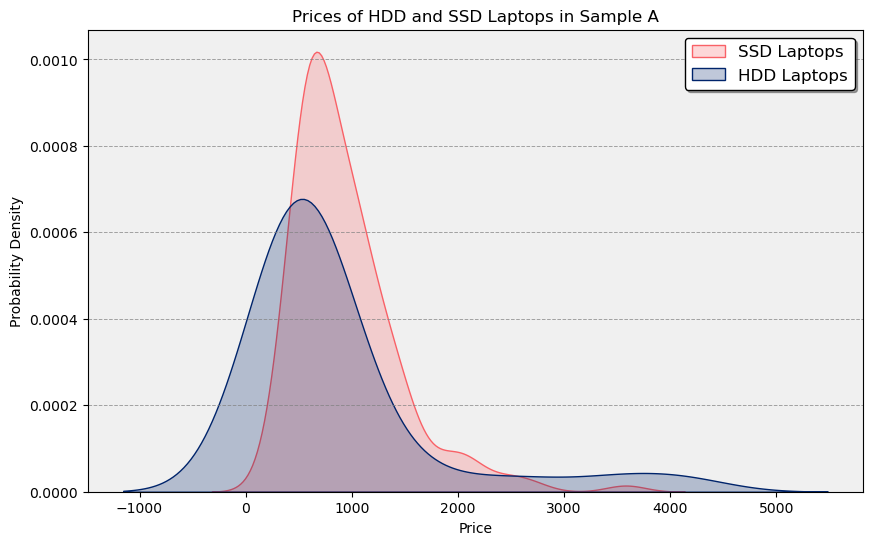

In [510]:
sample_ssd = df_sample_a[(df_sample_a['solid_state_drive'] != "0 GB") & (df_sample_a['hard_disk_drive'] == "0 GB")]['latest_price_usd']
sample_hdd = df_sample_a[(df_sample_a['solid_state_drive'] == "0 GB") & (df_sample_a['hard_disk_drive'] != "0 GB")]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_ssd, x=sample_ssd, color='#F96167', label="SSD Laptops", fill=True)
sns.kdeplot(data=sample_hdd, x=sample_hdd, color='#00246B', label="HDD Laptops", fill=True)

#Labeling axes
plt.title("Prices of HDD and SSD Laptops in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

ax = plt.gca()
ax.set_facecolor('#f0f0f0')


# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

#The KDE plot is assuming some negative values, despite there being no negative values.

In [507]:
stat, p_val = mannwhitneyu(sample_ssd, sample_hdd)
print(p_val)

alpha = 0.05

test_outcome(p_val, alpha=alpha)

0.0016371099590585666


'Reject the null hypothesis.'

### Interpretation

Based on our test outcome, we have found that there is a statistically significant difference between the means of both samples of laptops that have SSD's and laptops that have hard disk drives and as a result, further research is warranted.


### 3. Is there a significant difference in the prices of laptops based on their operating system? (Kruskal-Wallis H Test)

- $H_0$ : $\mu_{Windows} = \mu_{Mac} = \mu_{DOS}$

- $H_a$ : $H_0$ is not true

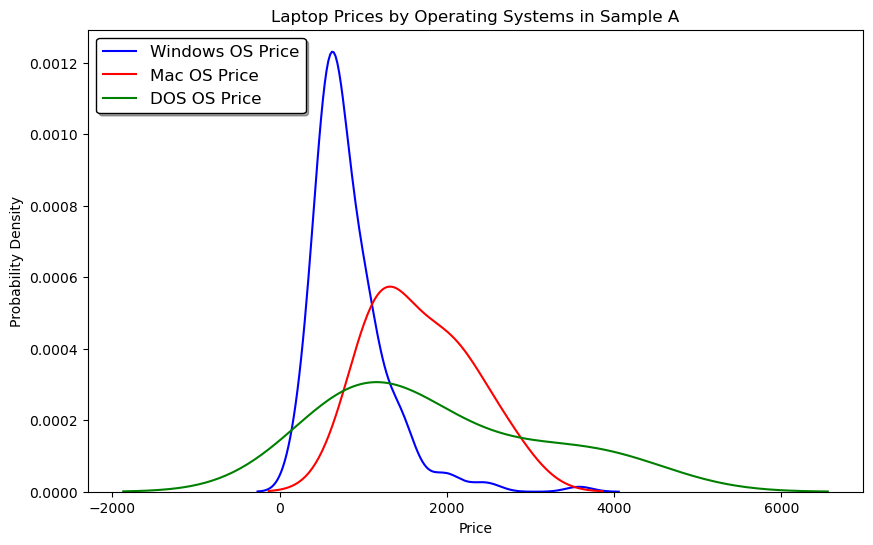

In [570]:
windows_sample = df_sample_a[df_sample_a['operating_system'] == "Windows"]['latest_price_usd']
mac_sample = df_sample_a[df_sample_a['operating_system'] == "Mac"]['latest_price_usd']
dos_sample = df_sample_a[df_sample_a['operating_system'] == "DOS"]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=windows_sample, x=windows_sample, color='blue', label="Windows OS Price", fill=False)
sns.kdeplot(data=mac_sample, x=mac_sample, color='red', label="Mac OS Price", fill=False)
sns.kdeplot(data=dos_sample, x=dos_sample, color='green', label="DOS OS Price", fill=False)

#Labeling axes
plt.title("Laptop Prices by Operating Systems in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [576]:
stat, p_value = kruskal(windows_sample, mac_sample, dos_sample)
p_value

test_outcome(p_value, alpha=alpha)

'Reject the null hypothesis.'

### Interpretation

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.2 Inferential Analysis via Central Limit Theorem (CLT)
</div>


### 4. Is there a significant difference in the ratings between different brands, such as Asus and HP? (Independent Student T-Test)

$H_0$: _There is no difference between the ratings in different brand such as Asus and HP._

$H_1$: _There is a difference between the ratings in different brand such as Asus and HP._

In [579]:
#Create a function to easily create a sample of means to apply CLT.

def generate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

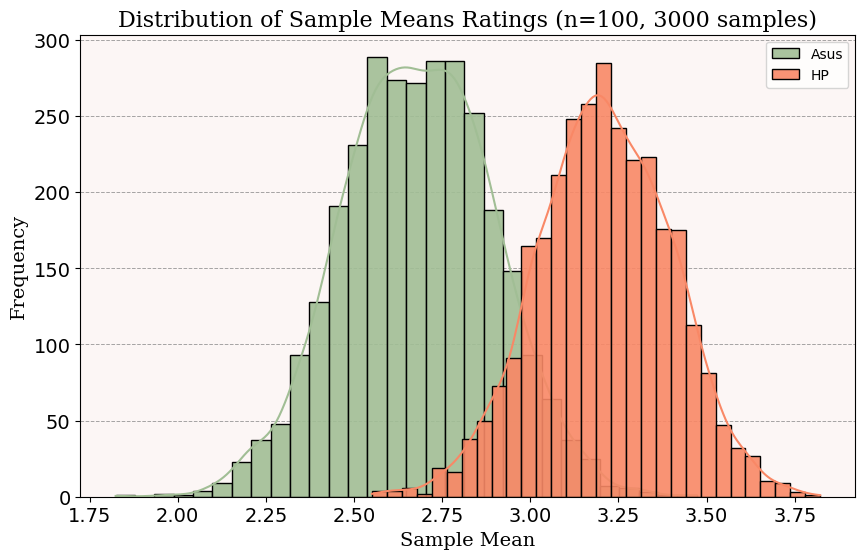

In [886]:
#Slice main DF by each computer brand.
asus_df = clean_df[clean_df['brand'] == "Asus"]
hp_df = clean_df[clean_df['brand'] == "Hp"]

#Only include star ratings in stored variables.
asus_data = asus_df['star_rating'].values
hp_data = hp_df['star_rating'].values

# Parameters for sampling
sample_size = 100  
num_samples = 3000  

# Generate sample means
asus_sample_means = generate_sample_means(asus_data, sample_size, num_samples)
hp_sample_means = generate_sample_means(hp_data, sample_size, num_samples)

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(asus_sample_means, kde=True, color='#A1BE95', bins=30, label="Asus", alpha=0.9, zorder=2)
sns.histplot(hp_sample_means, kde=True, color='#F98866', bins=30, label="HP", alpha=0.9, zorder=2)

#Set title and axis, additional plot customization
plt.title(f'Distribution of Sample Means Ratings (n={sample_size}, {num_samples} samples)', fontdict=font1)
plt.xlabel('Sample Mean', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7, zorder=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

#Set background of grid to custom color.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')

plt.show()

In [887]:
# Shapiro-Wilk test for normality for asus sample means.
_, p_value = stats.shapiro(asus_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")

_, p_value = stats.shapiro(hp_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")


0.5949664115905762
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).
0.14705248177051544
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).


In [889]:
# Perform a two-sample t-test on the sample means
stat, p_value = ttest_ind(asus_sample_means, hp_sample_means, equal_var=False)
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the ratings of laptops based on their operating system.")


0.0
Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.


### Interpretation

After performing our test, we have rejected the null hypothesis. There was found to be a significant difference in the ratings of laptops based on their brand between HP and Asus and therefore warrants additional research.

### 5. Do laptops with higher RAM tend to have higher prices compared to those that do not? (ANOVA Test)

- $H_0$ : $\mu_{4 GB} = \mu_{8 GB} = \mu_{16 GB}$

- $H_a$ : $H_0$ is not true

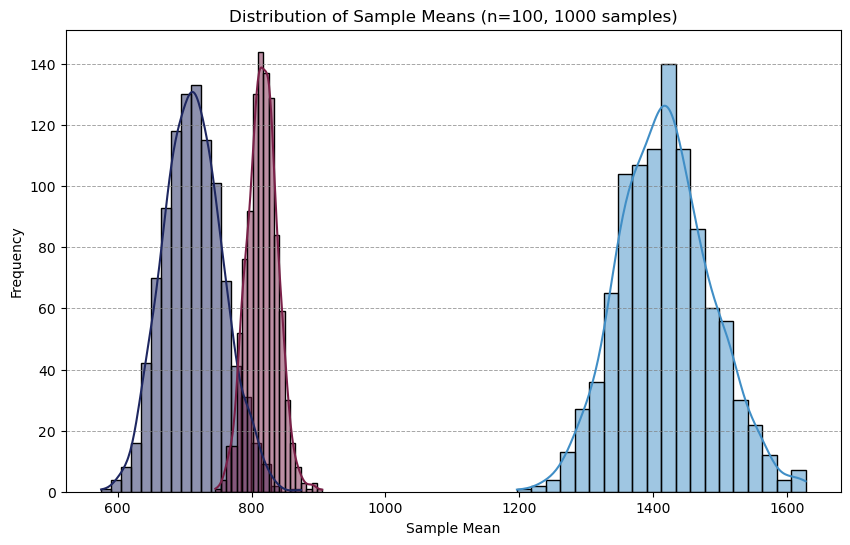

In [857]:
#Slice main DF by each RAM amount type and only include the USD value.
gb4_data = clean_df[clean_df['ram_gb'] == "4 GB"]['latest_price_usd'].values
gb8_data = clean_df[clean_df['ram_gb'] == "8 GB"]['latest_price_usd'].values
gb16_data = clean_df[clean_df['ram_gb'] == "16 GB"]['latest_price_usd'].values

# Parameters for sampling
sample_size = 100  
num_samples = 1000 

# Generate sample means
gb4_sample_means = generate_sample_means(gb4_data, sample_size, num_samples)
gb8_sample_means = generate_sample_means(gb8_data, sample_size + 200, num_samples)
gb16_sample_means = generate_sample_means(gb16_data, sample_size, num_samples)

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(gb4_sample_means, kde=True, color='#1E2761', bins=20)
sns.histplot(gb8_sample_means, kde=True, color='#7A2048', alpha=0.5, bins=20)
sns.histplot(gb16_sample_means, kde=True, color='#408EC6', bins=20)


#Customize the plot and label axis.
plt.title(f'Distribution of Sample Means (n={sample_size}, {num_samples} samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7, zorder=1)

plt.show()

In [818]:
# Shapiro-Wilk test for normality

#Test for 4 GB samples
_, p_value_one = stats.shapiro(gb4_sample_means)
print(p_value_one)

if p_value_one> 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 8GB samples
_, p_value_two = stats.shapiro(gb8_sample_means)
print(p_value_two)

if p_value_two > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 16GB samples
    _, p_value_three = stats.shapiro(gb16_sample_means)
print(p_value_three)

if p_value_three > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")



0.41022732853889465
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).

0.15864691138267517
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).

0.22651061415672302
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).


In [822]:
# ANOVA Test to determine if samples are significantly different.
stat, p_value = f_oneway(gb4_sample_means, gb8_sample_means, gb16_sample_means)
print(p_value)

#Interpret results
test_outcome(p_value, alpha)



0.0


'Reject the null hypothesis.'

### Interpretation

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.


<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 4: Analysis and Conclusions
</div>